In [1]:
#Import all Neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
import matplotlib.ticker as ticker

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Load in the cleaned dataset into a pandas dataframe, print statistics
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project /clean_crimedata.csv', index_col=0)

In [5]:
#Confirm that the right data set is loaded
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824724 entries, 10304468 to 230906458
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date_occ        824724 non-null  object 
 1   time_occ        824724 non-null  int64  
 2   AREA            824724 non-null  int64  
 3   area_name       824724 non-null  object 
 4   rpt_dist_no     824724 non-null  int64  
 5   crm_cd          824724 non-null  object 
 6   crm_cd_desc     824724 non-null  object 
 7   Mocodes         824724 non-null  object 
 8   vict_age        824724 non-null  int64  
 9   vict_sex        824724 non-null  object 
 10  vict_descent    824724 non-null  object 
 11  premis_cd       824724 non-null  float64
 12  premis_desc     824724 non-null  object 
 13  weapon_used_cd  824724 non-null  float64
 14  weapon_desc     824724 non-null  object 
 15  Status          824724 non-null  object 
 16  status_desc     824724 non-null  object 
 17  

In [6]:
# Drop unnecessary columns
df.drop(['date_occ', 'crm_cd_desc', 'weapon_desc', 'time_occ', 'crm_cd', 'AREA', 'rpt_dist_no', 'Mocodes', 'weapon_used_cd', 'Status', 'LOCATION',
         'cross_street', 'LAT', 'LON', 'Year', 'Month', 'Day', 'crime_category'], axis=1, inplace=True)

In [7]:
# Encode categorical variables
cat_cols = ['area_name', 'vict_sex', 'vict_descent', 'premis_desc', 'status_desc']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [8]:
# Take a random sample of size 5000 from the data
crime_data = df.sample(n=150000, random_state=42)

In [9]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(crime_data)

In [10]:
crime_data.head(5)

,area_name,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status_desc,crime_type
DR_NO,,,,,,,,
220409502,5,57,1,17,605.0,14,2,Property
221309729,9,27,1,7,101.0,266,2,Property
231108471,10,0,4,18,101.0,266,2,Property
201006524,19,0,3,12,107.0,295,2,Property
221116425,10,0,4,18,101.0,266,2,Property


## **Split the Data**

In [11]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = crime_data.drop('crime_type', axis=1)  # Features
y = crime_data['crime_type']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120000, 7)
X_test shape: (30000, 7)
y_train shape: (120000,)
y_test shape: (30000,)


### **Robust scaling**

In [12]:
# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the scaler on the training set
X_train_scaled = robust_scaler.fit_transform(X_train)

# Transform the testing set using the same scaler
X_test_scaled = robust_scaler.transform(X_test)

### **Model Training**

In [ ]:
# Initialize classifiers
rf = RandomForestClassifier()
svm = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()

# Create a list of classifiers and their respective parameter grids for hyperparameter tuning
classifiers = [('Random Forest', rf, {'n_estimators': [10, 50, 100]}),
               ('SVM', svm, {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
               ('Logistic Regression', lr, {'C': [0.1, 1, 10]}),
               ('KNN', knn, {'n_neighbors': [3, 5, 7]})]

# Define a dictionary to store the best estimator for each classifier after hyperparameter tuning
best_estimators = {}

# Iterate over each classifier and their respective parameter grid
for name, classifier, param_grid in classifiers:
    # Initialize GridSearchCV with the given classifier, parameter grid, and 5-fold cross-validation
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train_scaled, y_train)
    # Print the best hyperparameters for the current classifier
    print(f'Best hyperparameters for {name}: {grid_search.best_params_}')
    # Store the best estimator for the current classifier in the dictionary
    best_estimators[name] = grid_search.best_estimator_


Best hyperparameters for Random Forest: {'n_estimators': 50}


### **Model Architecture**

In [ ]:
# Print Random Forest hyperparameters
print("Random Forest Hyperparameters:")
print(best_estimators['Random Forest'])

# Print SVM hyperparameters
print("\nSVM Hyperparameters:")
print(best_estimators['SVM'])

# Print Logistic Regression hyperparameters
print("\nLogistic Regression Hyperparameters:")
print(best_estimators['Logistic Regression'])

# Print KNN hyperparameters
print("\nKNN Hyperparameters:")
print(best_estimators['KNN'])


## **the confusion matrix and classification report for each classifier**

In [ ]:
for name, model in best_estimators.items():
    # Generate predicted labels for test data using the best model
    y_pred = model.predict(X_test_scaled)
    # Print the confusion matrix and classification report for the current classifier
    print(f'Confusion matrix for {name}:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(f'Classification report for {name}:')
    print(classification_report(y_test, y_pred))
    print('\n')


## **the Accuracy score for each classifier**

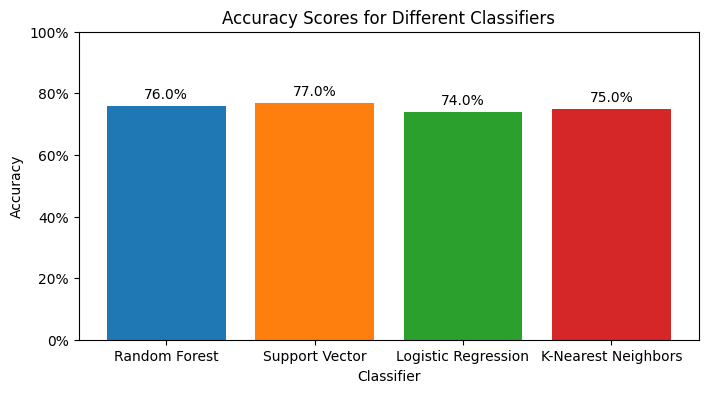

In [ ]:
classifiers = ['Random Forest', 'Support Vector', 'Logistic Regression', 'K-Nearest Neighbors']
accuracies = [0.76, 0.77, 0.74, 0.75]

fig, ax = plt.subplots(figsize=(8, 4))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create bar chart
rects = ax.bar(classifiers, accuracies, color=colors)

# Set y-axis to show percentages
ax.set_ylim([0, 1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# Add labels and title
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for Different Classifiers')

# Add text annotations for each bar
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.annotate(f'{accuracies[i]:.1%}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Display plot
plt.show()

## **the confusion Matrix Heatmap**

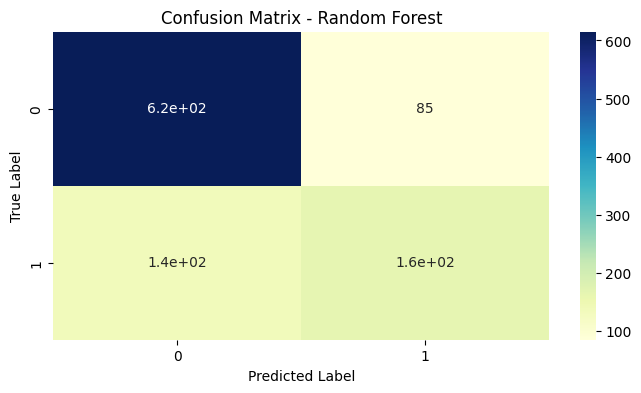

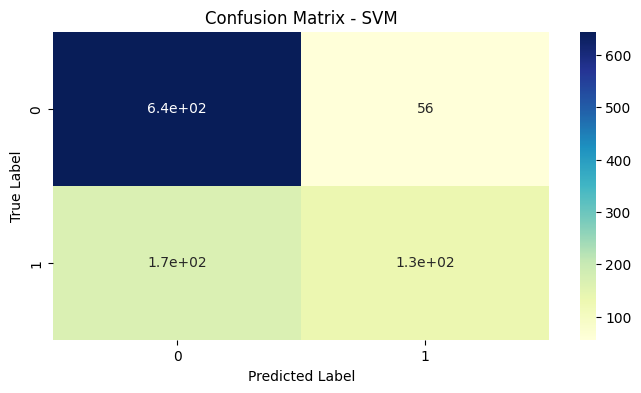

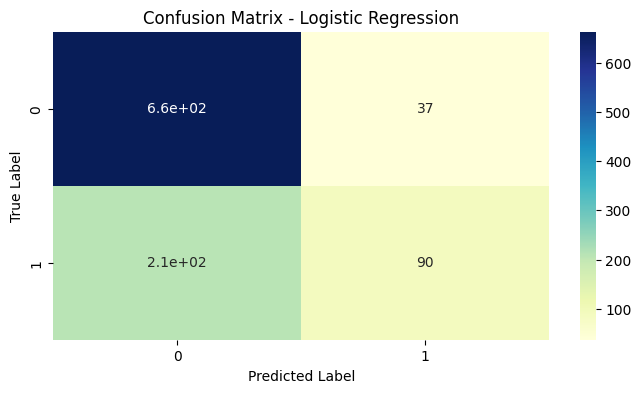

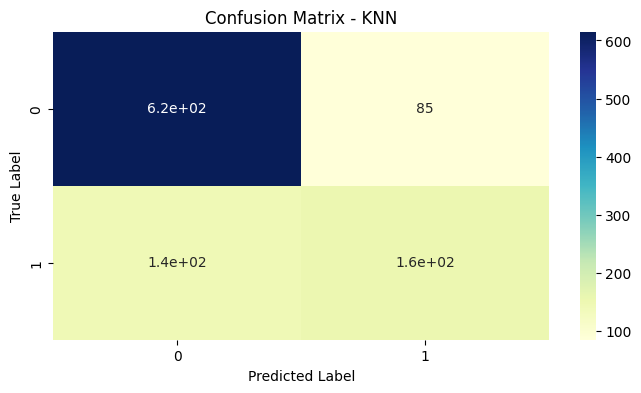

In [ ]:
# Iterate over the best estimators dictionary and create a confusion matrix heatmap for each classifier
for name, estimator in best_estimators.items():
    # Generate predicted labels for test data using the current classifier
    y_pred = estimator.predict(X_test_scaled)
    # Create a confusion matrix heatmap for the current classifier
    plt.figure(figsize=(8, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


## **FEATURE IMPORTANCE**

In [ ]:
#Calculate the Feature Importance

# create a pandas dataframe with features and their importance values
feature_importances_df = pd.DataFrame({'Feature': X_train.columns,
                                       'Importance': best_estimators['Random Forest'].feature_importances_})

# sort the dataframe by importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# display the dataframe
print(feature_importances_df)


        Feature  Importance
1      vict_age    0.301816
0     area_name    0.183520
6   status_desc    0.135612
4     premis_cd    0.114607
3  vict_descent    0.109494
5   premis_desc    0.100240
2      vict_sex    0.054711


[0.18351966 0.30181612 0.05471125 0.10949375 0.11460695 0.10023981
 0.13561246]


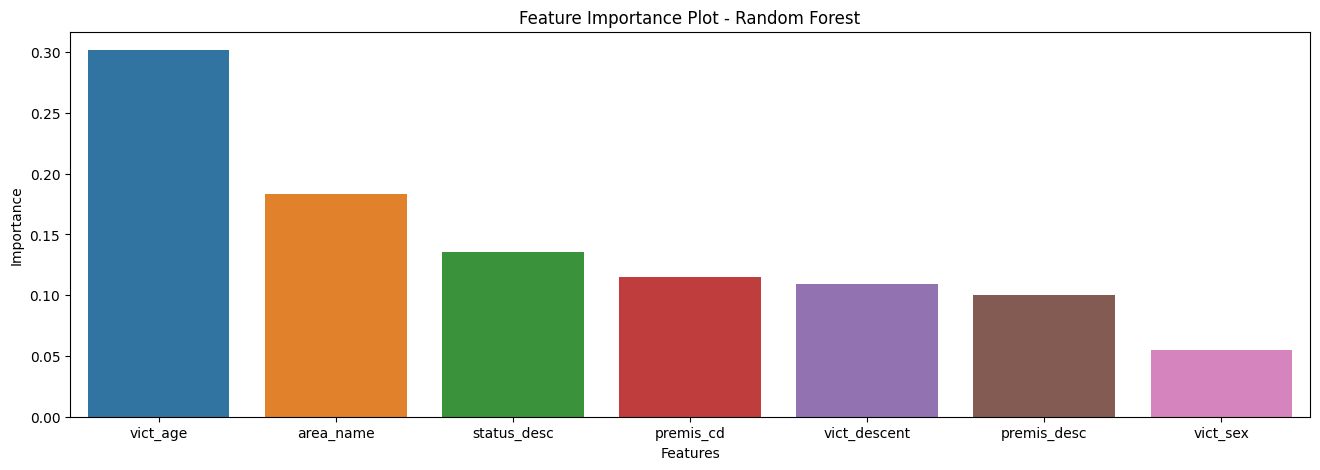

In [ ]:
# Get feature importances from the best Random Forest model
feature_importances = best_estimators['Random Forest'].feature_importances_

# print the numerical values of feature importances
print(feature_importances)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [crime_data.columns[i] for i in indices]
print(names)

# Create plot
plt.figure(figsize=(16, 5))
sns.barplot(x=names, y=feature_importances[indices])
plt.title("Feature Importance Plot - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
